# 🔰========= Summary ========== 🔰
  * ## **Dataset**: Food 101
  * ## Food 101 [Paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf)
    * ### Original authors used random forrest
    * ### Reference accuracy to beat: 50%

  * ## Use [EfficientNetB7](https://arxiv.org/pdf/1905.11946.pdf) as base model for transfer learning
    * ### EfficientNet-B7 peformed the best out of all the EffNetBx models.  

  

![Food 101 Dataset](https://drive.google.com/uc?id=11GQC42rxLrYiaFXOenC1SnQNqYZbqFqw)
![Food 101 Dataset](../ref_images/ref_04_transfer_learning_06.PNG)

<br>
<br>

![EffNetB7](https://drive.google.com/uc?id=1ZTrS3fVdwVqnRhcyzvt0PNmfp3lbUxZU)
![EffNetB7](../ref_images/ref_04_transfer_learning_07.PNG)

# 🔰========= Import Helper Scripts & Data ========== 🔰


In [ ]:
!nvidia-smi

Mon May 30 17:36:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://raw.githubusercontent.com/delta2echo/tensorflow_portfolio/main/scripts/helper_functions.py

--2022-05-30 17:41:50--  https://raw.githubusercontent.com/delta2echo/tensorflow_portfolio/main/scripts/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19782 (19K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  19.32K  --.-KB/s    in 0s      

2022-05-30 17:41:50 (67.0 MB/s) - ‘helper_functions.py’ saved [19782/19782]



In [ ]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2022-05-30 17:42:05--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2022-05-30 17:42:06--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  27.4MB/s    in 3m 3s   

2022-05-30 17:45:09 (26.1 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



# 🔰========= Setup ========== 🔰
  * Create a usable directory structure (similar to previous notebooks)
  * Move files into a usable directory structure

In [ ]:
from helper_functions import unzip_files, count_files, get_class_names
from helper_functions import make_subfolders, move_files

In [ ]:
unzip_files('food-101.tar.gz')

Done!


In [ ]:
image_folder = 'food-101/images'

In [ ]:
count_files(image_folder)

There are 1000 images in "food-101/images/frozen_yogurt".
There are 1000 images in "food-101/images/cheesecake".
There are 1000 images in "food-101/images/risotto".
There are 1000 images in "food-101/images/donuts".
There are 1000 images in "food-101/images/sashimi".
There are 1000 images in "food-101/images/spring_rolls".
There are 1000 images in "food-101/images/panna_cotta".
There are 1000 images in "food-101/images/ravioli".
There are 1000 images in "food-101/images/apple_pie".
There are 1000 images in "food-101/images/pork_chop".
There are 1000 images in "food-101/images/club_sandwich".
There are 1000 images in "food-101/images/peking_duck".
There are 1000 images in "food-101/images/gnocchi".
There are 1000 images in "food-101/images/fried_rice".
There are 1000 images in "food-101/images/chicken_wings".
There are 1000 images in "food-101/images/hot_and_sour_soup".
There are 1000 images in "food-101/images/edamame".
There are 1000 images in "food-101/images/samosa".
There are 1000 

In [ ]:
class_names = get_class_names(image_folder)

['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'cup_cakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'fish_and_chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'grilled_cheese_sandwich' 'grilled_salmon' 'guacamole'
 'gyoza' 'hamburger' 'hot_and_sour_soup' 'hot_dog' 'huevos_rancheros'
 'hummus' 'ice_cream' 'lasagna' 'lobster_bisque' 'lobster_roll_sandwich'
 'macaroni_and_cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oy

In [ ]:
#---Create a usable directory structure
make_subfolders('food-101/train',class_names)       
make_subfolders('food-101/test',class_names)

In [ ]:
#---- Move files into usable directory structure
move_files(file_names='food-101/meta/train.txt',
          move_from_dir='food-101/images',
          move_to_dir='food-101/train',
          class_names=class_names)

move_files(file_names='food-101/meta/test.txt',
          move_from_dir='food-101/images',
          move_to_dir='food-101/test',
          class_names=class_names)

done!
done!


In [ ]:
train_folder = 'food-101/train'
test_folder = 'food-101/test'
count_files(train_folder)
count_files(test_folder)

There are 750 images in "food-101/train/frozen_yogurt".
There are 750 images in "food-101/train/cheesecake".
There are 750 images in "food-101/train/risotto".
There are 750 images in "food-101/train/donuts".
There are 750 images in "food-101/train/sashimi".
There are 750 images in "food-101/train/spring_rolls".
There are 750 images in "food-101/train/panna_cotta".
There are 750 images in "food-101/train/ravioli".
There are 750 images in "food-101/train/apple_pie".
There are 750 images in "food-101/train/pork_chop".
There are 750 images in "food-101/train/club_sandwich".
There are 750 images in "food-101/train/peking_duck".
There are 750 images in "food-101/train/gnocchi".
There are 750 images in "food-101/train/fried_rice".
There are 750 images in "food-101/train/chicken_wings".
There are 750 images in "food-101/train/hot_and_sour_soup".
There are 750 images in "food-101/train/edamame".
There are 750 images in "food-101/train/samosa".
There are 750 images in "food-101/train/ceviche".
T

# 🔰====== Split Images into Train/Valid/Test Sets ======= 🔰

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
from helper_functions import view_random_images

In [ ]:
#---------- Setup:
SEED = 320
tf.random.set_seed(SEED)
IMG_SIZE = (224,224)
BATCH_SIZE = 32
VALID_SPLIT = 0.10
MODE = 'categorical'
B_SHUFF = True

#--------- Split:
train_data = image_dataset_from_directory(directory = train_folder,
                                          labels='inferred',
                                          image_size=IMG_SIZE,
                                          shuffle=B_SHUFF,
                                          label_mode=MODE,
                                          validation_split=VALID_SPLIT,
                                          subset='training',
                                          batch_size=BATCH_SIZE,
                                          seed=SEED+1)

valid_data = image_dataset_from_directory(directory=train_folder,
                                          labels='inferred',
                                          image_size=IMG_SIZE,
                                          shuffle=B_SHUFF,
                                          label_mode=MODE,
                                          validation_split=VALID_SPLIT,
                                          subset='validation',
                                          batch_size=BATCH_SIZE,
                                          seed=SEED+2)


test_data = image_dataset_from_directory(directory=test_folder,
                                         labels='inferred',
                                         image_size=IMG_SIZE,
                                         label_mode=MODE,
                                         batch_size=BATCH_SIZE,
                                         shuffle=False)

Found 75750 files belonging to 101 classes.
Using 68175 files for training.
Found 75750 files belonging to 101 classes.
Using 7575 files for validation.
Found 25250 files belonging to 101 classes.


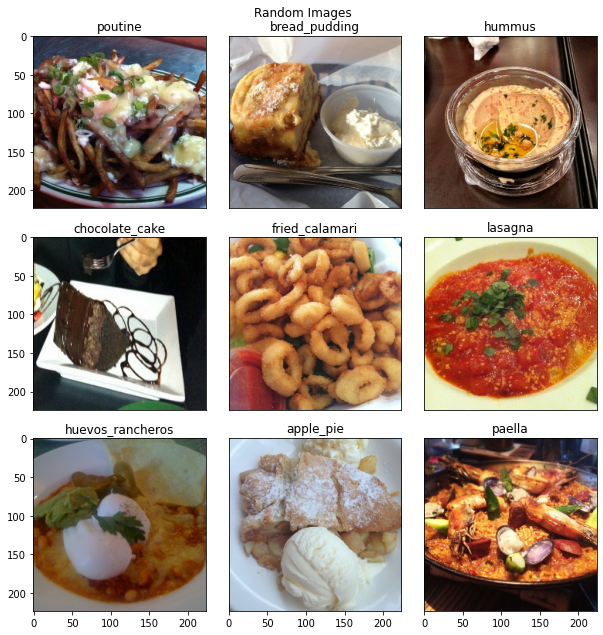

In [ ]:
view_random_images(train_data,class_names)

# 🔰============= Build Model ============= 🔰
  * ### To start **train on 10% of images** to establish a baseline.
  * ### **Random guessing** would produce an **accuracy of 1%**.

In [ ]:
from helper_functions import Training_Plot, BuildCompileFit, ContinueTraining
from helper_functions import create_tensorboard_callback,create_checkpoint_callback

In [ ]:
from tensorflow.keras import Sequential,Model,optimizers
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.layers import  Input, Flatten, Reshape, Dense, Activation, concatenate, Conv2D
from tensorflow.keras.layers import RandomFlip,RandomHeight, RandomWidth, RandomZoom, RandomRotation,Resizing
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
class CNTR:
  def __init__(self,start=0):
    self.num = start
  
  def __call__(self):
    self.num += 1
    return self.num - 1

258088960/258076736 [==============================] - 1s 0us/step
Set checkpoint log files to: ./callbacks/checkpoints//model_0/Exp1/220528_231711.ckpt
Set TensorBoard log files to: ./callbacks/tensorboard/model_0/Exp1/220528_231711
Epoch 1/21
106/106 [==============================] - ETA: 0s - loss: 20.8045 - accuracy: 0.1645
Epoch 1: saving model to ./callbacks/checkpoints//model_0/Exp1/220528_231711.ckpt
106/106 [==============================] - 63s 326ms/step - loss: 20.8045 - accuracy: 0.1645 - val_loss: 20.7768 - val_accuracy: 0.2330
Epoch 2/21
106/106 [==============================] - ETA: 0s - loss: 20.6051 - accuracy: 0.2435
Epoch 2: saving model to ./callbacks/checkpoints//model_0/Exp1/220528_231711.ckpt
106/106 [==============================] - 30s 283ms/step - loss: 20.6051 - accuracy: 0.2435 - val_loss: 20.4992 - val_accuracy: 0.3011
Epoch 3/21
106/106 [==============================] - ETA: 0s - loss: 22.6072 - accuracy: 0.2721
Epoch 3: saving model to ./callbacks/ch

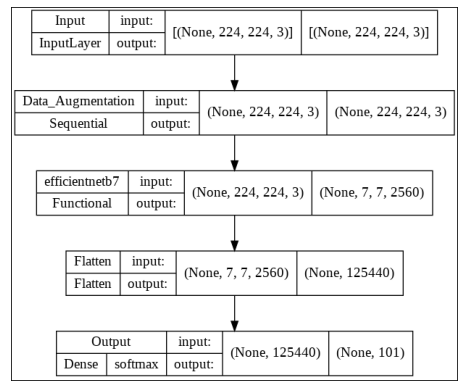

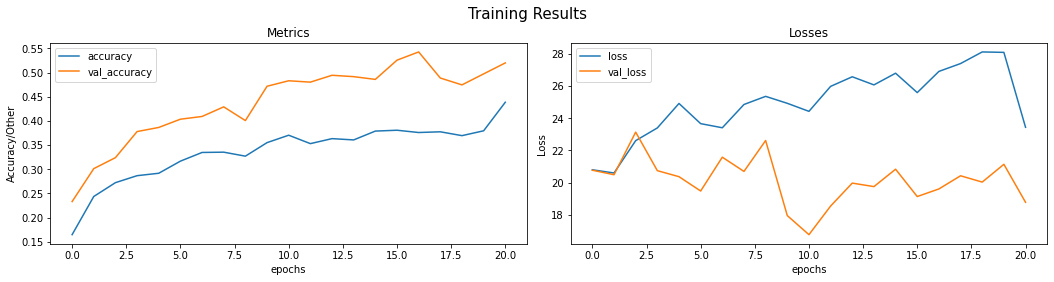

In [ ]:
#------------ Setup
SEED = 432
tf.random.set_seed(SEED)
INPUT_SHAPE = IMG_SIZE + (3,)
NUM_CLASSES = len(class_names)
LOSS = 'categorical_crossentropy'
DATA_PERCENT = 0.05
EPOCHS = 21
cntr = CNTR(1)
ExpNum = CNTR(1)
#------------ initilize base layers
layer_data_augment = Sequential([Input(shape=INPUT_SHAPE,name='Aug_Input'),
                                 RandomFlip('horizontal',seed=SEED+1),
                                 RandomRotation(factor=(-0.10,0.10),seed=SEED+2),
                                 RandomHeight(factor=0.10,seed=SEED+3),
                                 RandomWidth(factor=0.10,seed=SEED+4),
                                 RandomZoom(height_factor=0.10,seed=SEED+5),
                                 Resizing(height=IMG_SIZE[0],width=IMG_SIZE[1])
                                ],name='Data_Augmentation')

layer_EffNet = EfficientNetB7(include_top=False,
                              input_shape=INPUT_SHAPE,
                              )
layer_EffNet.trainable = False

#------------ build architecture:

#----- Functional:
n = cntr()
inputs = Input(shape=INPUT_SHAPE,name='Input')
x = layer_data_augment(inputs)
x = layer_EffNet(x)
x = Flatten(name='Flatten')(x)
outputs = Dense(units=NUM_CLASSES, name='Output', activation='softmax')(x)


#---------- setup callbacks
Exp = ExpNum()
checkpoint_file = './callbacks/checkpoints/'
checkpoint_M0 = create_checkpoint_callback(dir_name=checkpoint_file,
                                           experiment_name=f'model_0/Exp{Exp}')


tensorboard_files = './callbacks/tensorboard'
tb_M0 = create_tensorboard_callback(dir_name=tensorboard_files,
                                    experiment_name=f'model_0/Exp{Exp}')

#---------- Build, Compile, Fit:


model_0, history_0 = BuildCompileFit(trn_data=train_data,
                                     val_data=valid_data,
                                     layers=None,
                                     model=Model(inputs,outputs,name='Model_0'),
                                     loss=LOSS,
                                     optimizer=optimizers.Adam(),
                                     metrics=['accuracy'],
                                     callbacks=[checkpoint_M0,tb_M0],
                                     rndSeed=SEED+6,
                                     epochs=EPOCHS,
                                     train_percent=DATA_PERCENT,
                                     validation_percent=DATA_PERCENT,
                                     verbose=1,
                                     show_model=True,
                                     model_name='model_0')




In [ ]:
model_0.evaluate(test_data) #.4935

790/790 [==============================] - 183s 231ms/step - loss: 21.6528 - accuracy: 0.4863


[21.652786254882812, 0.4862574338912964]

# 🔑 Generally the Model is fitting well durring training

  * ## After **21 epochs with only 5% of the training data** the model has already achieved ~**49% testing accuracy**. 
  * ## The **training & validation losses** are generally **inline** implying that the **model is not overfitting** the training data.
  * ## Since the **model will likely benefit from continued training**, we can now **increase the data percentage to 25%**.

# 🔰=========== Fine Tuning =========== 🔰


In [ ]:
from helper_functions import Show_Is_Trainable

In [ ]:
#----- Make the Last 10 layers trainable
layer_EffNet.trainable = False
for layer in layer_EffNet.layers[-10:]:
  layer.trainable = True

Show_Is_Trainable(layer_EffNet,10)

NameError: ignored

Set checkpoint log files to: ./callbacks/checkpoints//model_0/Exp2/220528_233300.ckpt
Set TensorBoard log files to: ./callbacks/tensorboard/model_0/Exp2/220528_233300
steps durring training: 532
steps durring validation: 59
Epoch 21/30
532/532 [==============================] - ETA: 0s - loss: 18.8529 - accuracy: 0.5096
Epoch 21: saving model to ./callbacks/checkpoints//model_0/Exp2/220528_233300.ckpt
532/532 [==============================] - 166s 278ms/step - loss: 18.8529 - accuracy: 0.5096 - val_loss: 14.1431 - val_accuracy: 0.5869
Epoch 22/30
532/532 [==============================] - ETA: 0s - loss: 16.3439 - accuracy: 0.5179
Epoch 22: saving model to ./callbacks/checkpoints//model_0/Exp2/220528_233300.ckpt
532/532 [==============================] - 144s 271ms/step - loss: 16.3439 - accuracy: 0.5179 - val_loss: 12.2563 - val_accuracy: 0.6133
Epoch 23/30
532/532 [==============================] - ETA: 0s - loss: 14.0611 - accuracy: 0.5515
Epoch 23: saving model to ./callbacks/chec

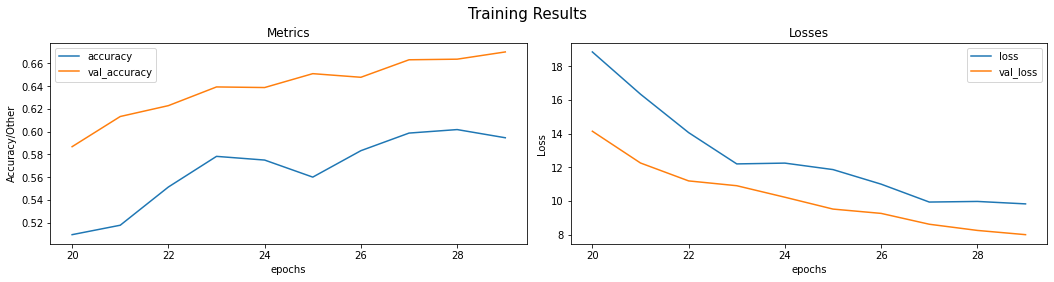

In [ ]:
DATA_PERCENT = 0.25
new_epochs = 10
last_epoch_number = history_0.epoch[-1]
total_epochs = last_epoch_number + new_epochs

model_0.compile(optimizer=optimizers.Adam(learning_rate=10**-4),
                loss=LOSS,
                metrics=['accuracy'])

Exp = ExpNum()
checkpoint_file = './callbacks/checkpoints/'
checkpoint_M0 = create_checkpoint_callback(dir_name=checkpoint_file,
                                           experiment_name=f'model_0/Exp{Exp}')


tensorboard_files = './callbacks/tensorboard'
tb_M0 = create_tensorboard_callback(dir_name=tensorboard_files,
                                    experiment_name=f'model_0/Exp{Exp}')

model_0, history_0 = ContinueTraining(trn_data=train_data,
                                      val_data=valid_data,
                                      model=model_0,
                                      callbacks=[checkpoint_M0,tb_M0],
                                      epochs=total_epochs,
                                      initial_epoch=last_epoch_number,
                                      train_percent=DATA_PERCENT,
                                      validation_percent=DATA_PERCENT,
                                      verbose=1)

In [ ]:
model_0.evaluate(test_data)

790/790 [==============================] - 182s 230ms/step - loss: 10.6730 - accuracy: 0.5977


[10.673004150390625, 0.5976633429527283]

# ⚡ After 30 Epochs, and **Fine-Tuning on 25% of the train data** the model is able to achieve **~60% test accuracy**. 

# 🔑 This is a **20% boost** over the baseline. 

# The model will continue to be fine-tuned. 

In [ ]:
#----- Make the Last 10 layers trainable
layer_EffNet.trainable = False
for layer in layer_EffNet.layers[-6:]:
  layer.trainable = True

Show_Is_Trainable(layer_EffNet,6)

...806 untrainable layers
807 block7d_project_bn                   True
808 block7d_drop                         True
809 block7d_add                          True
810 top_conv                             True
811 top_bn                               True
812 top_activation                       True


Set checkpoint log files to: ./callbacks/checkpoints//model_0/Exp3/220529_000151.ckpt
Set TensorBoard log files to: ./callbacks/tensorboard/model_0/Exp3/220529_000151
steps durring training: 1065
steps durring validation: 118
Epoch 30/39
1065/1065 [==============================] - ETA: 0s - loss: 8.6719 - accuracy: 0.6151
Epoch 30: saving model to ./callbacks/checkpoints//model_0/Exp3/220529_000151.ckpt
1065/1065 [==============================] - 311s 275ms/step - loss: 8.6719 - accuracy: 0.6151 - val_loss: 7.3185 - val_accuracy: 0.6729
Epoch 31/39
1065/1065 [==============================] - ETA: 0s - loss: 8.5075 - accuracy: 0.6110
Epoch 31: saving model to ./callbacks/checkpoints//model_0/Exp3/220529_000151.ckpt
1065/1065 [==============================] - 288s 271ms/step - loss: 8.5075 - accuracy: 0.6110 - val_loss: 6.8020 - val_accuracy: 0.6782
Epoch 32/39
1065/1065 [==============================] - ETA: 0s - loss: 7.4102 - accuracy: 0.6341
Epoch 32: saving model to ./callbacks

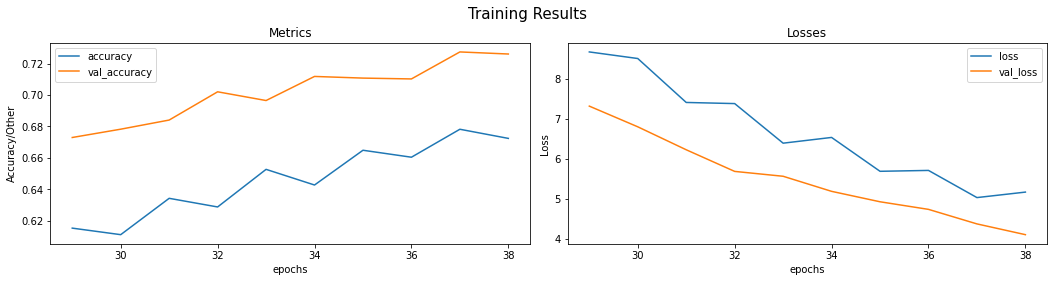

In [ ]:
DATA_PERCENT = 0.50
new_epochs = 10
last_epoch_number = history_0.epoch[-1]
total_epochs = last_epoch_number + new_epochs

model_0.compile(optimizer=optimizers.Adam(learning_rate=10**-4),
                loss=LOSS,
                metrics=['accuracy'])

Exp = ExpNum()
checkpoint_file = './callbacks/checkpoints/'
checkpoint_M0 = create_checkpoint_callback(dir_name=checkpoint_file,
                                           experiment_name=f'model_0/Exp{Exp}')


tensorboard_files = './callbacks/tensorboard'
tb_M0 = create_tensorboard_callback(dir_name=tensorboard_files,
                                    experiment_name=f'model_0/Exp{Exp}')

model_0, history_0 = ContinueTraining(trn_data=train_data,
                                      val_data=valid_data,
                                      model=model_0,
                                      callbacks=[checkpoint_M0,tb_M0],
                                      epochs=total_epochs,
                                      initial_epoch=last_epoch_number,
                                      train_percent=DATA_PERCENT,
                                      validation_percent=DATA_PERCENT,
                                      verbose=1)

In [ ]:
model_0.evaluate(test_data)

790/790 [==============================] - 183s 231ms/step - loss: 7.9434 - accuracy: 0.6044


[7.943437576293945, 0.6043564081192017]

## ❗Interestingly there was no improvement between the last two training runs even though the training & the validation sets improved. This is likely because the test set is dissimilar to both the train and validation set.

In [ ]:
#----- Make the Last 8 layers trainable
layer_EffNet.trainable = False
for layer in layer_EffNet.layers[-3:]:
  layer.trainable = True

Show_Is_Trainable(layer_EffNet,3)

...809 untrainable layers
810 top_conv                             True
811 top_bn                               True
812 top_activation                       True


Set checkpoint log files to: ./callbacks/checkpoints//model_0/Exp4/220529_005927.ckpt
Set TensorBoard log files to: ./callbacks/tensorboard/model_0/Exp4/220529_005927
steps durring training: 1598
steps durring validation: 177
Epoch 39/48
1598/1598 [==============================] - ETA: 0s - loss: 4.6496 - accuracy: 0.6885
Epoch 39: saving model to ./callbacks/checkpoints//model_0/Exp4/220529_005927.ckpt
1598/1598 [==============================] - 454s 273ms/step - loss: 4.6496 - accuracy: 0.6885 - val_loss: 4.1122 - val_accuracy: 0.7288
Epoch 40/48
1598/1598 [==============================] - ETA: 0s - loss: 4.2690 - accuracy: 0.7004
Epoch 40: saving model to ./callbacks/checkpoints//model_0/Exp4/220529_005927.ckpt
1598/1598 [==============================] - 432s 271ms/step - loss: 4.2690 - accuracy: 0.7004 - val_loss: 3.7085 - val_accuracy: 0.7421
Epoch 41/48
1598/1598 [==============================] - ETA: 0s - loss: 4.0989 - accuracy: 0.7038
Epoch 41: saving model to ./callbacks

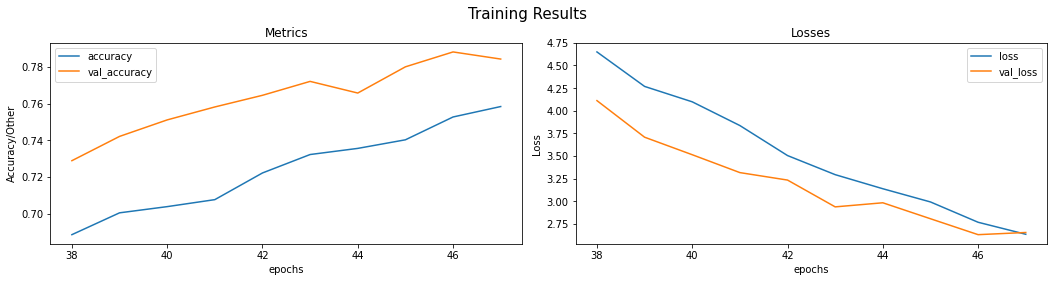

In [ ]:
DATA_PERCENT = 0.75
new_epochs = 10
last_epoch_number = history_0.epoch[-1]
total_epochs = last_epoch_number + new_epochs

model_0.compile(optimizer=optimizers.Adam(learning_rate=10**-4),
                loss=LOSS,
                metrics=['accuracy'])

Exp = ExpNum()
checkpoint_file = './callbacks/checkpoints/'
checkpoint_M0 = create_checkpoint_callback(dir_name=checkpoint_file,
                                           experiment_name=f'model_0/Exp{Exp}')


tensorboard_files = './callbacks/tensorboard'
tb_M0 = create_tensorboard_callback(dir_name=tensorboard_files,
                                    experiment_name=f'model_0/Exp{Exp}')

model_0, history_0 = ContinueTraining(trn_data=train_data,
                                      val_data=valid_data,
                                      model=model_0,
                                      callbacks=[checkpoint_M0,tb_M0],
                                      epochs=total_epochs,
                                      initial_epoch=last_epoch_number,
                                      train_percent=DATA_PERCENT,
                                      validation_percent=DATA_PERCENT,
                                      verbose=1)

In [ ]:
model_0.evaluate(test_data)

790/790 [==============================] - 183s 231ms/step - loss: 7.0041 - accuracy: 0.6067


[7.004096031188965, 0.6066930890083313]

# 🔑 The model has stabalized with a test accuracy of 60%. 
# 🔑 One last round of training with the full datasets will be used to round off the model. 

In [ ]:
#----- Make the Last 8 layers trainable
layer_EffNet.trainable = False

Set checkpoint log files to: ./callbacks/checkpoints//model_0/Exp5/220529_022032.ckpt
Set TensorBoard log files to: ./callbacks/tensorboard/model_0/Exp5/220529_022032
steps durring training: 2131
steps durring validation: 237
Epoch 48/57
2131/2131 [==============================] - ETA: 0s - loss: 2.0008 - accuracy: 0.8031
Epoch 48: saving model to ./callbacks/checkpoints//model_0/Exp5/220529_022032.ckpt
2131/2131 [==============================] - 598s 272ms/step - loss: 2.0008 - accuracy: 0.8031 - val_loss: 2.1485 - val_accuracy: 0.8173
Epoch 49/57
2131/2131 [==============================] - ETA: 0s - loss: 1.8945 - accuracy: 0.8087
Epoch 49: saving model to ./callbacks/checkpoints//model_0/Exp5/220529_022032.ckpt
2131/2131 [==============================] - 577s 271ms/step - loss: 1.8945 - accuracy: 0.8087 - val_loss: 2.0805 - val_accuracy: 0.8236
Epoch 50/57
2131/2131 [==============================] - ETA: 0s - loss: 1.8076 - accuracy: 0.8157
Epoch 50: saving model to ./callbacks

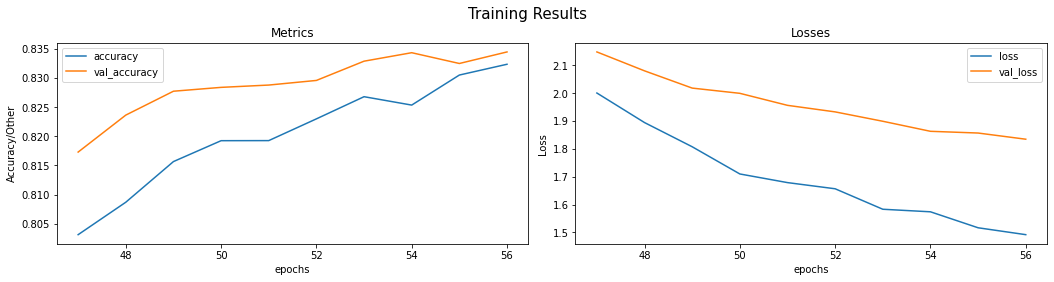

In [ ]:
DATA_PERCENT = 1.0
new_epochs = 10
last_epoch_number = history_0.epoch[-1]
total_epochs = last_epoch_number + new_epochs

model_0.compile(optimizer=optimizers.Adam(learning_rate=10**-5),
                loss=LOSS,
                metrics=['accuracy'])

Exp = ExpNum()
checkpoint_file = './callbacks/checkpoints/'
checkpoint_M0 = create_checkpoint_callback(dir_name=checkpoint_file,
                                           experiment_name=f'model_0/Exp{Exp}')


tensorboard_files = './callbacks/tensorboard'
tb_M0 = create_tensorboard_callback(dir_name=tensorboard_files,
                                    experiment_name=f'model_0/Exp{Exp}')

model_0, history_0 = ContinueTraining(trn_data=train_data,
                                      val_data=valid_data,
                                      model=model_0,
                                      callbacks=[checkpoint_M0,tb_M0],
                                      epochs=total_epochs,
                                      initial_epoch=last_epoch_number,
                                      train_percent=DATA_PERCENT,
                                      validation_percent=DATA_PERCENT,
                                      verbose=1)

In [ ]:
model_0.evaluate(test_data) #.613

790/790 [==============================] - 184s 232ms/step - loss: 5.9860 - accuracy: 0.6256


[5.985958099365234, 0.6256237626075745]

## 🔰========================================================================== 🔰
## Currently the model was able to achieve a **62.5% test accuracy**, which is a **25% improvement** over the authors 50% baseline.  

## It appears That the training curves have not yet flattened and would likely see further improvement with more training. 

In [ ]:
#------------ Setup
SEED = 432
tf.random.set_seed(SEED)
INPUT_SHAPE = IMG_SIZE + (3,)
NUM_CLASSES = len(class_names)
LOSS = 'categorical_crossentropy'
DATA_PERCENT = 1.0
EPOCHS = 11
cntr = CNTR(1)
ExpNum = CNTR(1)
#------------ initilize base layers
layer_data_augment = Sequential([Input(shape=INPUT_SHAPE,name='Aug_Input'),
                                 RandomFlip('horizontal',seed=SEED+1),
                                 RandomRotation(factor=(-0.10,0.10),seed=SEED+2),
                                 RandomHeight(factor=0.10,seed=SEED+3),
                                 RandomWidth(factor=0.10,seed=SEED+4),
                                 RandomZoom(height_factor=0.10,seed=SEED+5),
                                 Resizing(height=IMG_SIZE[0],width=IMG_SIZE[1])
                                ],name='Data_Augmentation')

layer_EffNet = EfficientNetB7(include_top=False,
                              input_shape=INPUT_SHAPE,
                              )
layer_EffNet.trainable = False

In [ ]:
#----- Make the Last 10 layers trainable
layer_EffNet.trainable = False
for layer in layer_EffNet.layers[-10:]:
  layer.trainable = True

Show_Is_Trainable(layer_EffNet,10)

...802 untrainable layers
803 block7d_se_reduce                    True
804 block7d_se_expand                    True
805 block7d_se_excite                    True
806 block7d_project_conv                 True
807 block7d_project_bn                   True
808 block7d_drop                         True
809 block7d_add                          True
810 top_conv                             True
811 top_bn                               True
812 top_activation                       True


Set checkpoint log files to: ./callbacks/checkpoints//model_0/Exp1/220530_183031.ckpt
Set TensorBoard log files to: ./callbacks/tensorboard/model_0/Exp1/220530_183031
Epoch 1/11
2131/2131 [==============================] - ETA: 0s - loss: 26.8586 - accuracy: 0.3247
Epoch 1: saving model to ./callbacks/checkpoints//model_0/Exp1/220530_183031.ckpt
2131/2131 [==============================] - 619s 279ms/step - loss: 26.8586 - accuracy: 0.3247 - val_loss: 21.9255 - val_accuracy: 0.4931
Epoch 2/11
2131/2131 [==============================] - ETA: 0s - loss: 25.7466 - accuracy: 0.4443
Epoch 2: saving model to ./callbacks/checkpoints//model_0/Exp1/220530_183031.ckpt
2131/2131 [==============================] - 588s 276ms/step - loss: 25.7466 - accuracy: 0.4443 - val_loss: 19.2520 - val_accuracy: 0.5683
Epoch 3/11
2131/2131 [==============================] - ETA: 0s - loss: 24.3925 - accuracy: 0.4953
Epoch 3: saving model to ./callbacks/checkpoints//model_0/Exp1/220530_183031.ckpt
2131/2131 [=

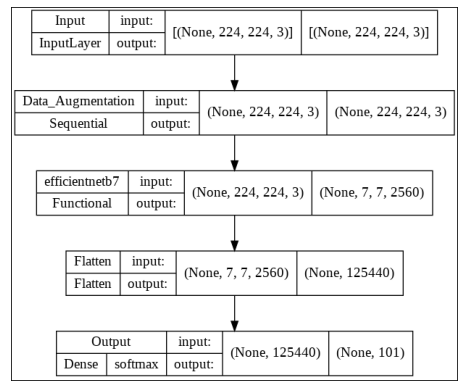

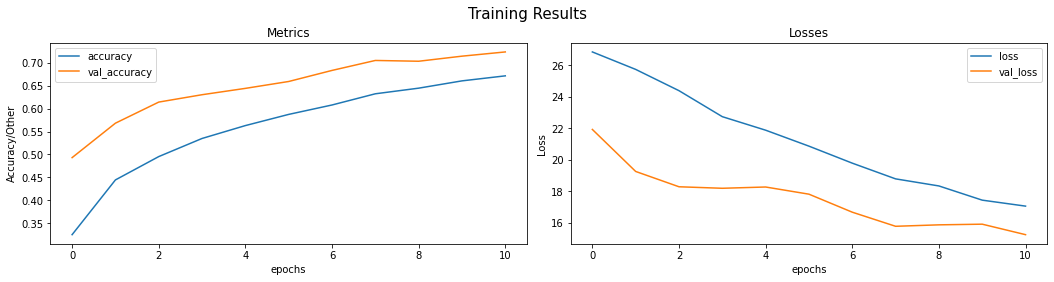

In [ ]:
#------------ build architecture:

#----- Functional:
n = cntr()
inputs = Input(shape=INPUT_SHAPE,name='Input')
x = layer_data_augment(inputs)
x = layer_EffNet(x)
x = Flatten(name='Flatten')(x)
outputs = Dense(units=NUM_CLASSES, name='Output', activation='softmax')(x)


#---------- setup callbacks
Exp = ExpNum()
checkpoint_file = './callbacks/checkpoints/'
checkpoint_M0 = create_checkpoint_callback(dir_name=checkpoint_file,
                                           experiment_name=f'model_0/Exp{Exp}')


tensorboard_files = './callbacks/tensorboard'
tb_M0 = create_tensorboard_callback(dir_name=tensorboard_files,
                                    experiment_name=f'model_0/Exp{Exp}')

#---------- Build, Compile, Fit:


model_0, history_0 = BuildCompileFit(trn_data=train_data,
                                     val_data=valid_data,
                                     layers=None,
                                     model=Model(inputs,outputs,name='Model_0'),
                                     loss=LOSS,
                                     optimizer=optimizers.Adam(),
                                     metrics=['accuracy'],
                                     callbacks=[checkpoint_M0,tb_M0],
                                     rndSeed=SEED+6,
                                     epochs=EPOCHS,
                                     train_percent=DATA_PERCENT,
                                     validation_percent=DATA_PERCENT,
                                     verbose=1,
                                     show_model=True,
                                     model_name='model_0')

In [ ]:
model_0.evaluate(test_data)

790/790 [==============================] - 187s 235ms/step - loss: 32.9969 - accuracy: 0.5628


[32.996944427490234, 0.562772274017334]

In [ ]:
!zip -r /content/callbacks.zip /content/callbacks

  adding: content/callbacks/ (stored 0%)
  adding: content/callbacks/checkpoints/ (stored 0%)
  adding: content/callbacks/checkpoints/model_0/ (stored 0%)
  adding: content/callbacks/checkpoints/model_0/Exp1/ (stored 0%)
  adding: content/callbacks/checkpoints/model_0/Exp1/checkpoint (deflated 41%)
  adding: content/callbacks/checkpoints/model_0/Exp1/220530_175819.ckpt.data-00000-of-00001 (deflated 8%)
  adding: content/callbacks/checkpoints/model_0/Exp1/220530_183031.ckpt.index (deflated 80%)
  adding: content/callbacks/checkpoints/model_0/Exp1/220530_175819.ckpt.index (deflated 80%)
  adding: content/callbacks/checkpoints/model_0/Exp1/220530_183031.ckpt.data-00000-of-00001 (deflated 8%)
  adding: content/callbacks/tensorboard/ (stored 0%)
  adding: content/callbacks/tensorboard/model_0/ (stored 0%)
  adding: content/callbacks/tensorboard/model_0/Exp1/ (stored 0%)
  adding: content/callbacks/tensorboard/model_0/Exp1/220530_175819/ (stored 0%)
  adding: content/callbacks/tensorboard/mo

In [ ]:
from google.colab import files
files.download('/content/callbacks.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 🔰=============== Review Performance ============ 🔰

In [ ]:
from sklearn.metrics import confusion_matrix
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y_pred = model_0.predict(test_data)
y_pred = y_pred.argmax(axis=1)
print(y_pred.shape)

(25250,)


In [ ]:
y_test = []
for img,label in test_data.unbatch():
  y_test.append(label.numpy().argmax())

y_test = np.array(y_test)
print(y_test.shape)

(25250,)


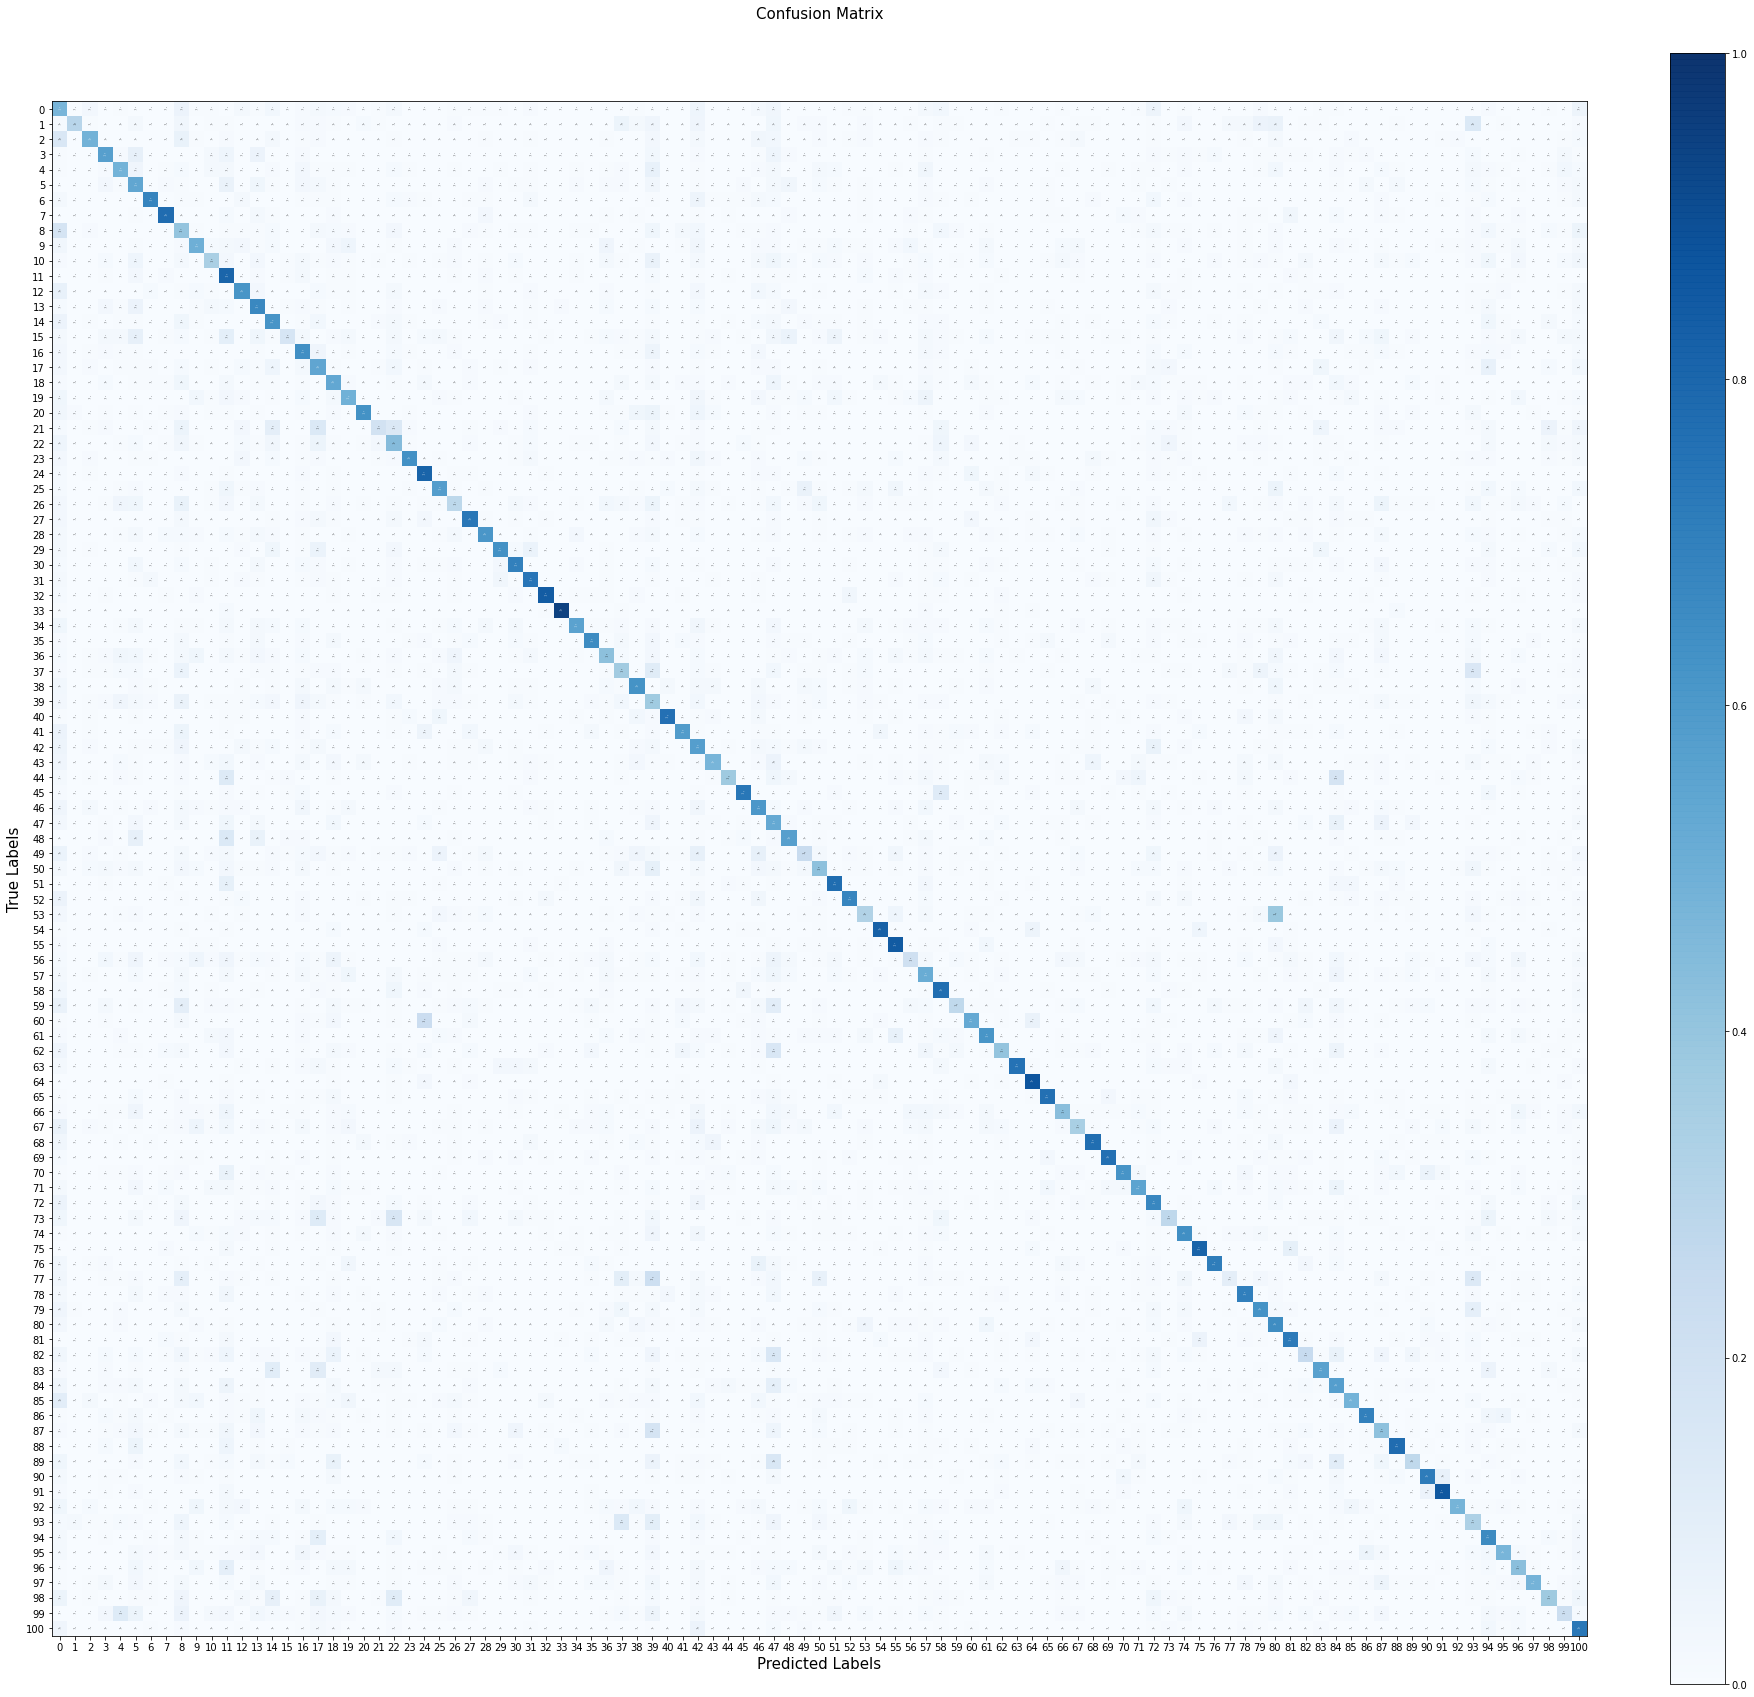

In [ ]:
cm_norm = Plot_CM(y_test,y_pred,figsize=(30,30),txt_size=1.0)

In [ ]:
from sklearn.metrics import classification_report
from pandas import DataFrame

In [ ]:
print(classification_report(y_true=y_test,
                            y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.16      0.48      0.24       250
           1       0.90      0.30      0.45       250
           2       0.72      0.49      0.58       250
           3       0.61      0.57      0.59       250
           4       0.53      0.49      0.51       250
           5       0.32      0.54      0.40       250
           6       0.85      0.68      0.76       250
           7       0.84      0.78      0.81       250
           8       0.20      0.40      0.27       250
           9       0.57      0.50      0.53       250
          10       0.57      0.34      0.43       250
          11       0.32      0.81      0.46       250
          12       0.65      0.62      0.63       250
          13       0.48      0.67      0.56       250
          14       0.47      0.62      0.54       250
          15       0.70      0.17      0.27       250
          16       0.48      0.65      0.55       250
          17       0.34    

In [ ]:
#==== Create Dictionary of F1 scores
class_f1 = {}
for key,val in classification_report(y_test,y_pred,output_dict=True).items():
  if key not in ('accuracy', 'macro avg', 'weighted avg'):
    class_f1[class_names[int(key)]] = {val['f1-score'],val['precision'],val['recall']}

#==== Create DataFrame
df = DataFrame.from_dict(class_f1,orient='index',columns=['F1','precision','recall'])

In [ ]:
df.sort_values(by='F1')

,F1,precision,recall
pork_chop,0.157377,0.096000,0.436364
foie_gras,0.225728,0.162021,0.372000
apple_pie,0.242363,0.476000,0.162568
bread_pudding,0.270053,0.404000,0.202811
ceviche,0.270968,0.700000,0.168000
...,...,...,...
spaghetti_carbonara,0.839844,0.820611,0.860000
hot_and_sour_soup,0.848361,0.869748,0.828000
macarons,0.851351,0.974227,0.756000
dumplings,0.862986,0.882845,0.844000


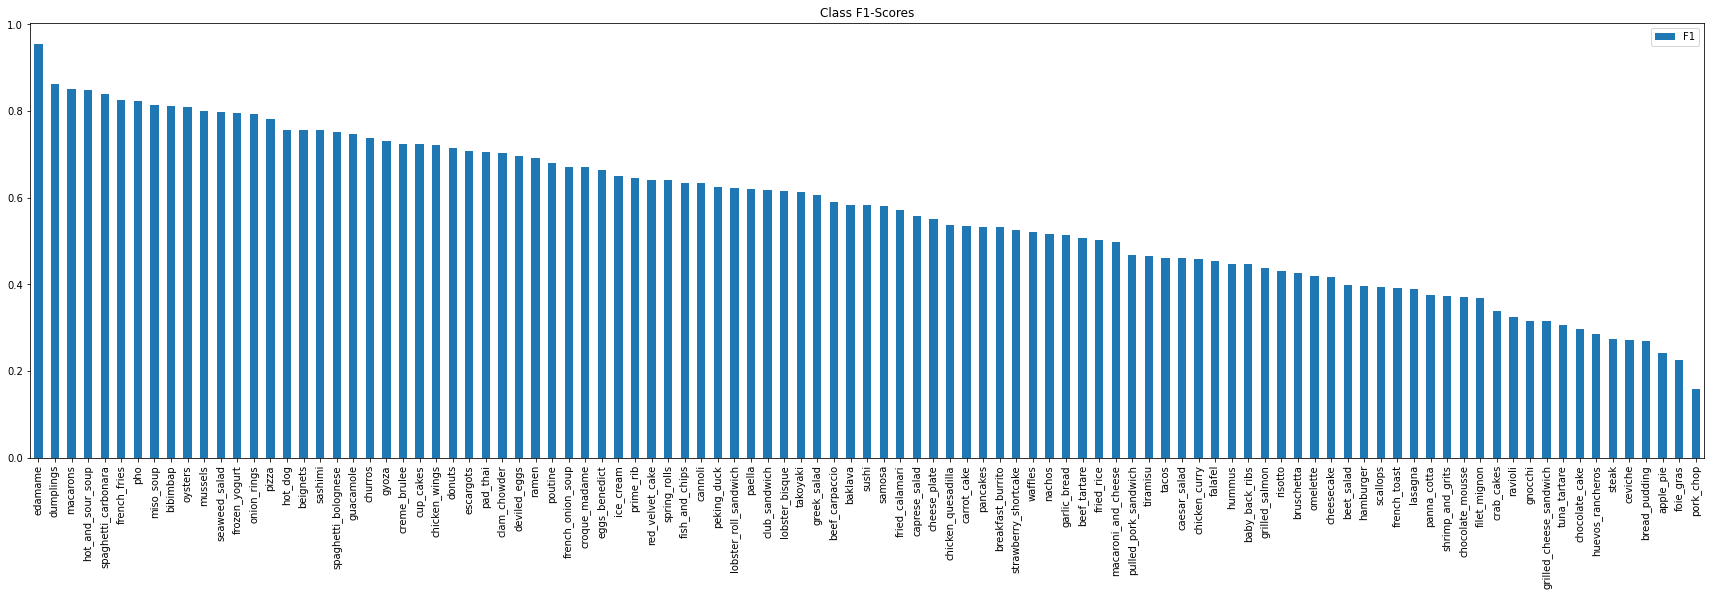

In [ ]:
ax = df.sort_values(by='F1',ascending=False).plot(kind='bar',figsize=(30,8),title='Class F1-Scores')

In [ ]:
print('abc_def'.replace('_','\n'))

abc
def


In [ ]:
int(np.random.random()*45)

28

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


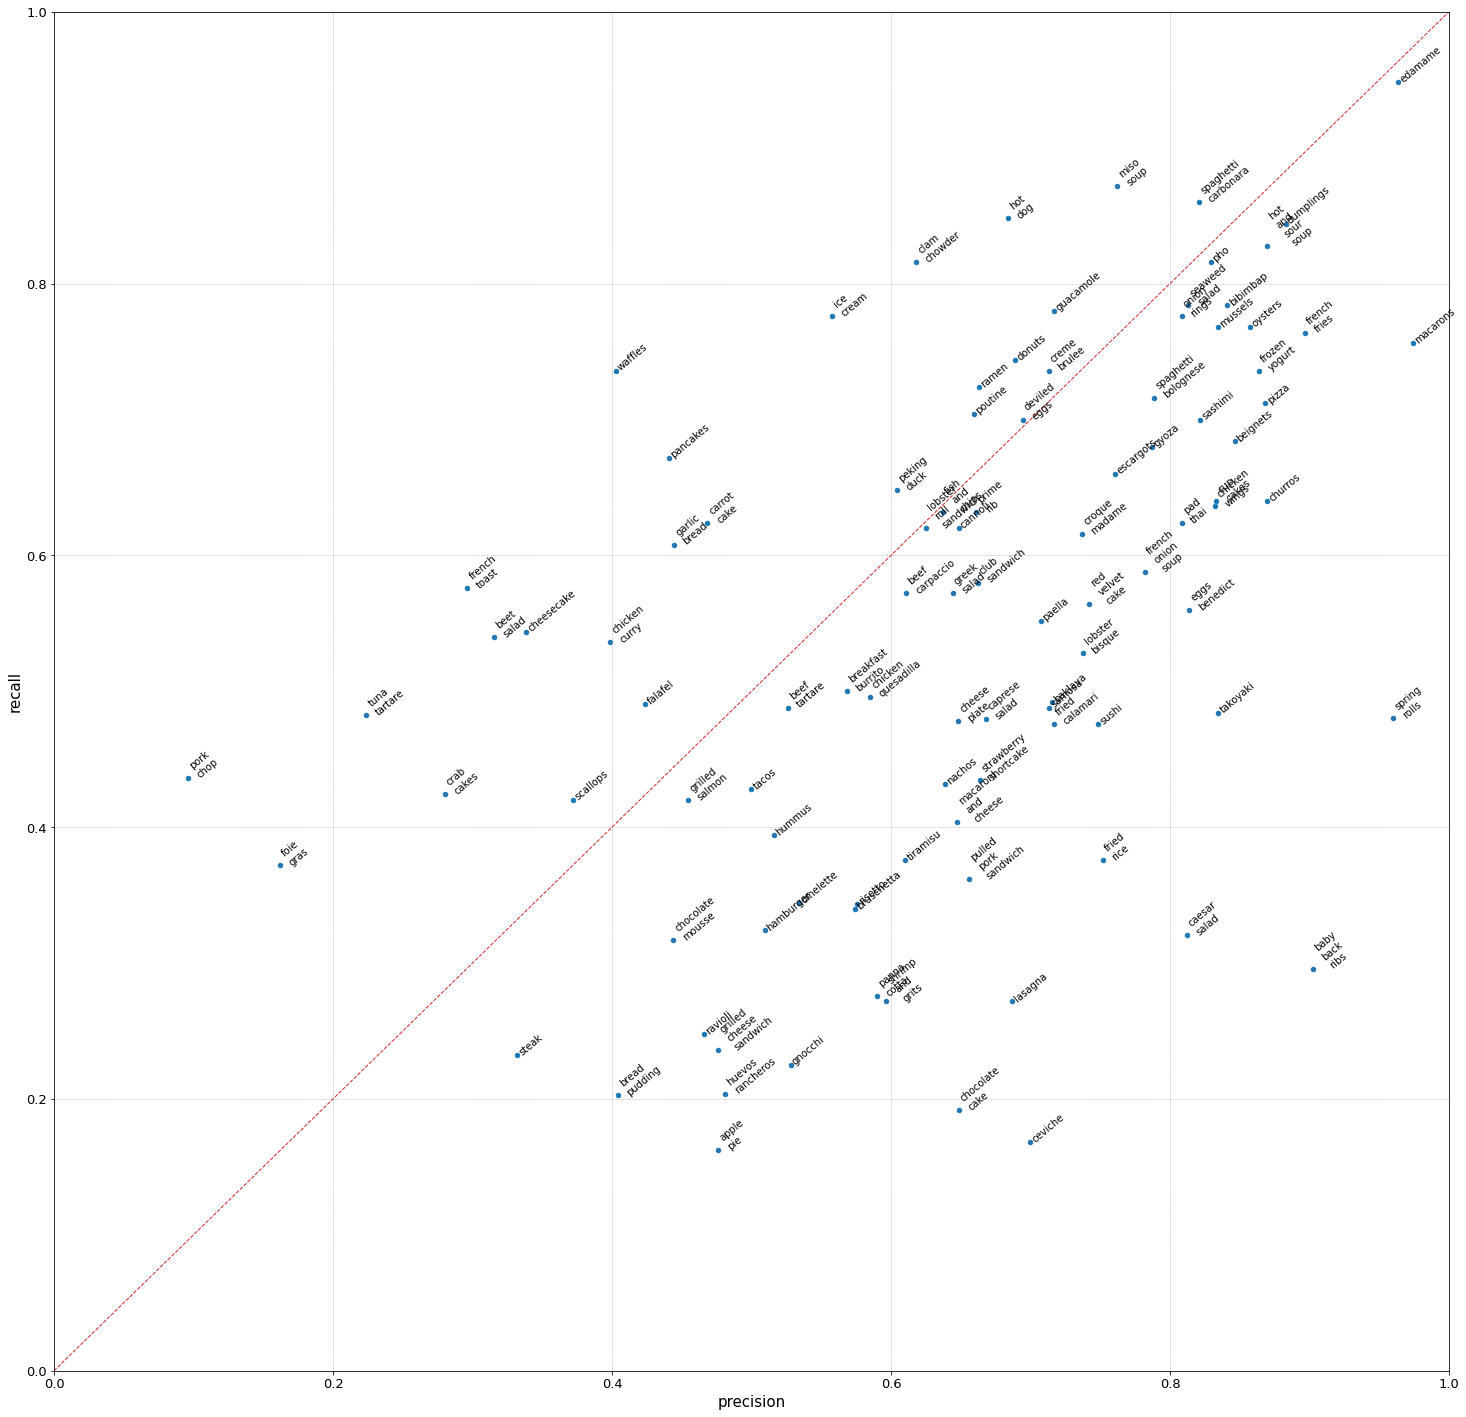

In [ ]:
ax = df.plot(x='precision',y='recall',kind='scatter',figsize=(25,25),fontsize=13,c='tab:blue')
ax.plot(np.linspace(0,1,50),np.linspace(0,1,50),ls='--',c='tab:red',lw=1.0)
ax.grid(True,axis='both',lw=0.5,ls='--')
_=ax.set_ylabel('recall',fontdict={'fontsize':15})
_=ax.set_xlabel('precision',fontdict={'fontsize':15})
_=ax.set_ylim(0,1)
_=ax.set_xlim(0,1)

for name,vals in df.T.items():
  _ = ax.text(vals['precision'],vals['recall'],s=name.replace('_','\n'),fontsize=10,rotation=40)